# Testataan muita visualisointikirjastoja

* Perustuu matplotlibiin
* Tekee kuvaajista hienompia esim. paremmilla väripaleteilla
* Käytetään statistiseen visualisointiin

In [1]:
# kirjastot
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# plotit näkyviin notebookissa
%matplotlib inline

### Datasetin jakauma

In [6]:
sns.set(color_codes = True)
np.random.seed(sum(map(ord, "distributions")))

C:\Users\mikkok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


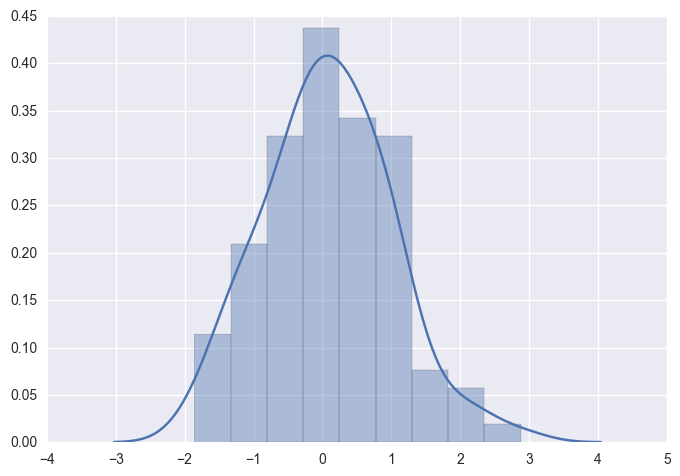

In [7]:
x = np.random.normal(size = 100)
sns.distplot(x);

# selvitä mitä tarkoittaa kernel density estimate (KDE)

C:\Users\mikkok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


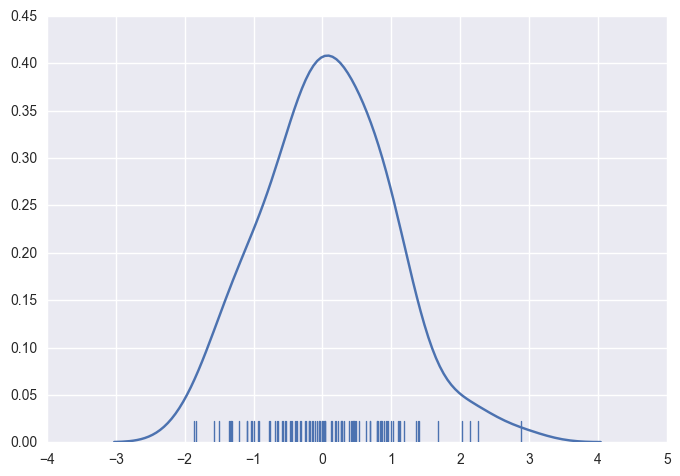

In [8]:
sns.distplot(x, hist = False, rug = True)
#rugplot()

C:\Users\mikkok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


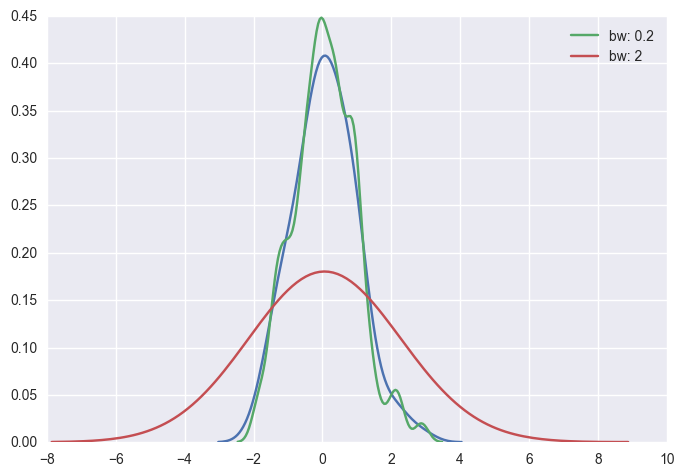

In [9]:
# Fit and plot a univariate or bivariate kernel density estimate
sns.kdeplot(x)
sns.kdeplot(x, bw =.2, label = "bw: 0.2")
sns.kdeplot(x, bw = 2, label = "bw: 2")
plt.legend()

In [10]:
mean, cov = [0, 1], [(1, 5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns = ["x", "y"])

C:\Users\mikkok\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


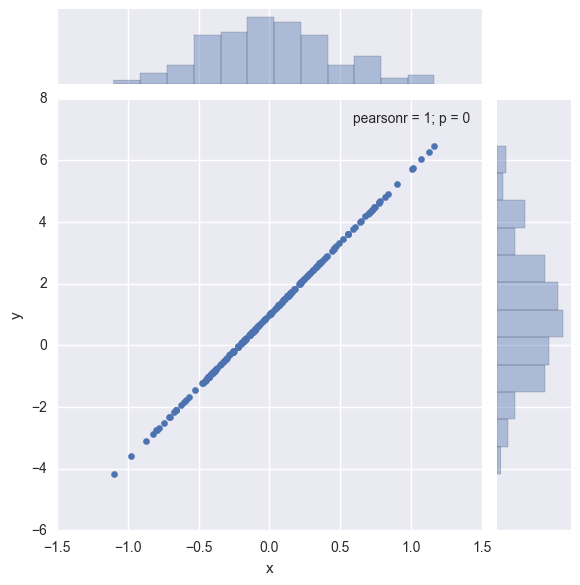

In [11]:
sns.jointplot(x = "x", y = "y", data = df)

### Lineaariset suhteet

In [13]:
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")

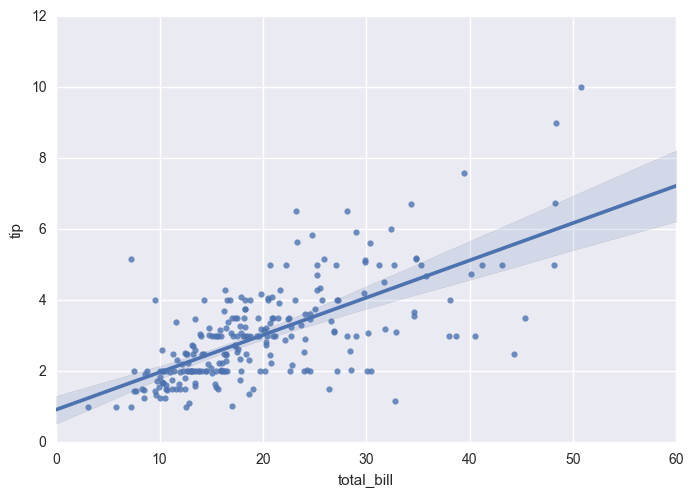

In [14]:
sns.regplot( x = "total_bill", y = "tip", data = tips)

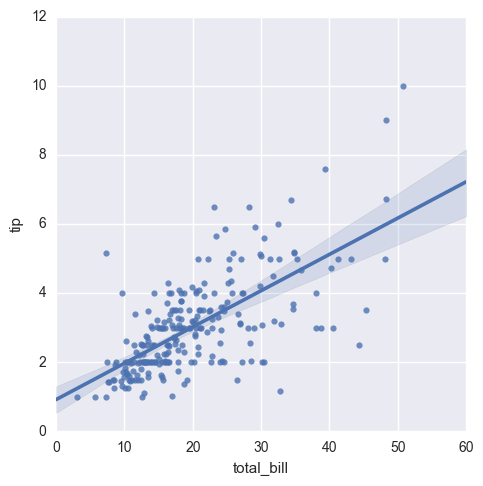

In [15]:
sns.lmplot( x = "total_bill", y = "tip", data = tips)

In [16]:
anscombe = sns.load_dataset("anscombe")

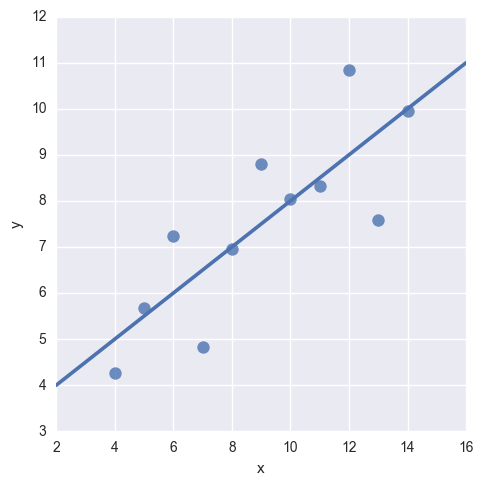

In [17]:
sns.lmplot( x = "x", y = "y", data = anscombe.query("dataset == 'I'"), ci = None, scatter_kws = { "s": 80 })

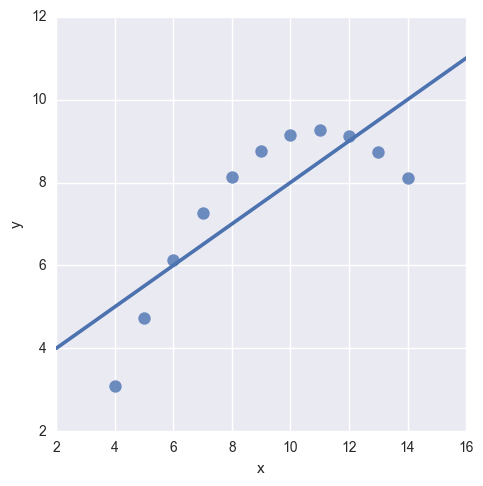

In [18]:
sns.lmplot( x = "x", y = "y", data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws = { "s": 80 })

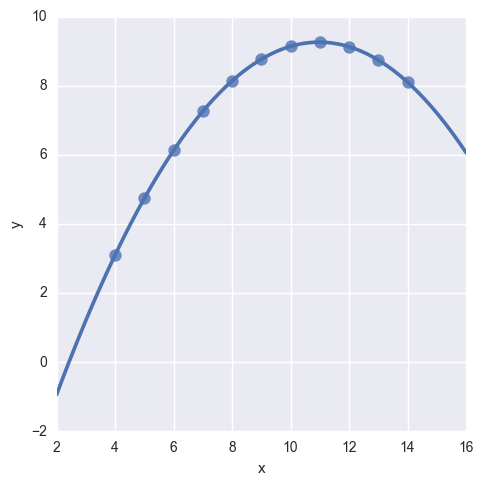

In [19]:
sns.lmplot( x = "x", y = "y", data = anscombe.query("dataset == 'II'"), order = 2, ci = None, scatter_kws = { "s": 80 })

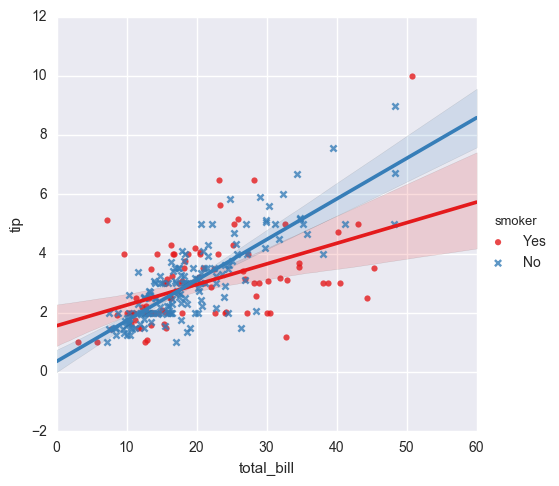

In [20]:
sns.lmplot( x = "total_bill", y = "tip", hue = "smoker", data = tips, markers = ["o", "x"], palette = "Set1")

### Kategoriadata

In [21]:
import matplotlib as mpl

In [22]:
sns.set(style = "whitegrid", color_codes = True)
np.random.seed(sum(map(ord, "categorial")))

In [23]:
titanic = sns.load_dataset("titanic")

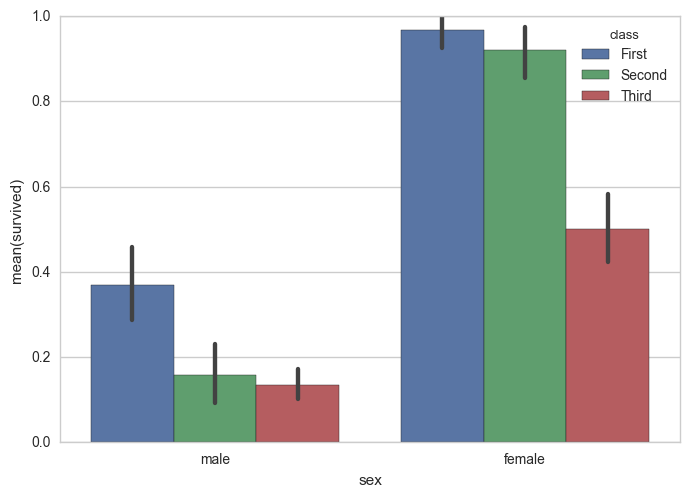

In [24]:
sns.barplot( x = "sex", y = "survived", hue = "class", data = titanic)

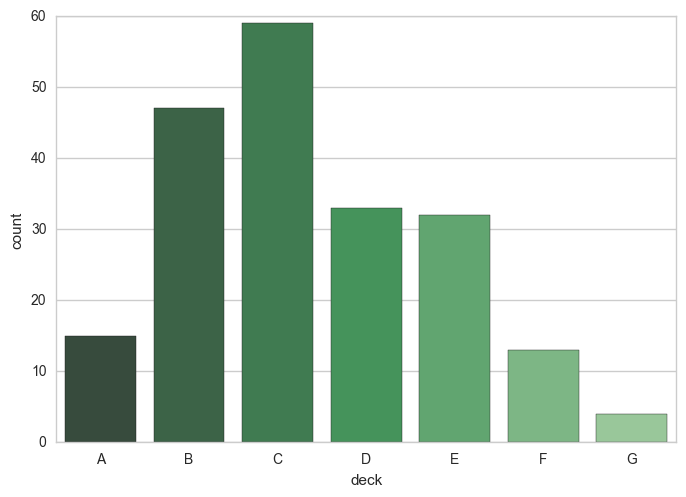

In [27]:
sns.countplot( x = "deck", data = titanic, palette = "Greens_d")

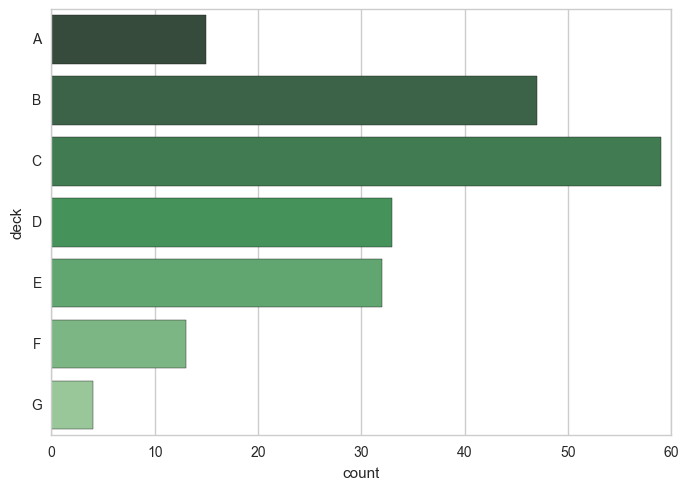

In [28]:
sns.countplot( y = "deck", data = titanic, palette = "Greens_d")

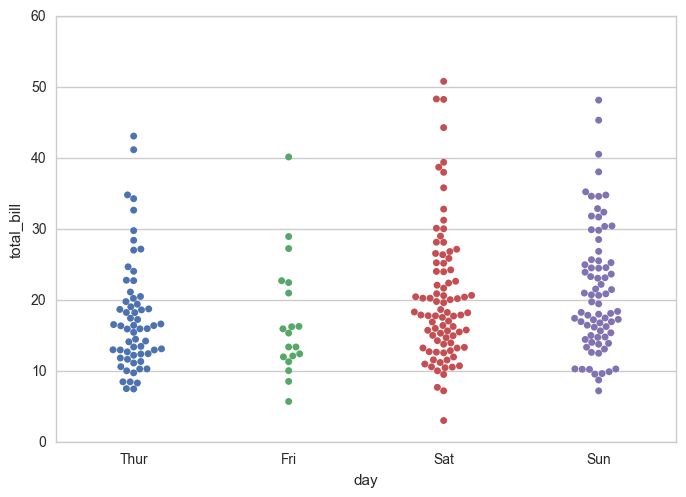

In [30]:
sns.swarmplot( x = "day", y = "total_bill", data = tips)
# stripplot() vinkki: käytä jitter = True parametria